In [1]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.tolerance = tolerance
        self.weights = None
        self.bias = 0

    def fit(self, X, Y):
        # Ensure X is a 2D array
        X = np.array(X)
        Y = np.array(Y)
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for i in range(self.iterations):
            y_pred = np.dot(X, self.weights) + self.bias

            gradient_weights = -2 * np.dot(X.T, (Y - y_pred)) / n_samples
            gradient_bias = -2 * np.sum(Y - y_pred) / n_samples

            self.weights -= self.learning_rate * gradient_weights
            self.bias -= self.learning_rate * gradient_bias

            if np.linalg.norm(gradient_weights) < self.tolerance and abs(gradient_bias) < self.tolerance:
                break

        print(f"Weights after training: {self.weights}, Bias: {self.bias:.4f}")

    def predict(self, X):
        X = np.array(X)
        return np.dot(X, self.weights) + self.bias


Weights after training: [20.19559604 55.35960321  2.77317789 63.73299939 92.40188282 69.04256051
 83.26387417  7.76192063  2.90295306 71.32800639], Bias: 2.6318


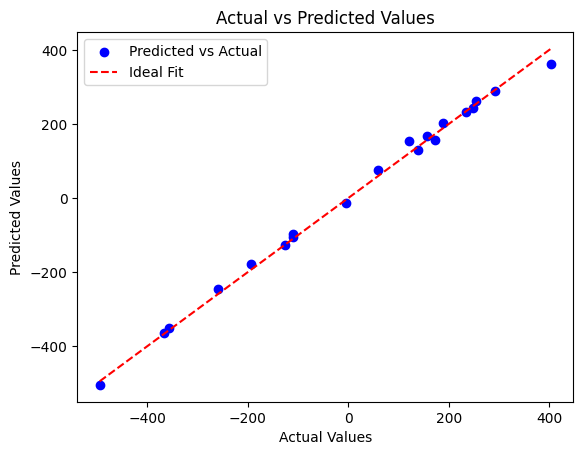

MSE on training data is 230.9872


In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X, Y = make_regression(n_samples=100, n_features=10, noise=15, random_state=42)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


LinReg = LinearRegression()

LinReg.fit(X_train, Y_train)

predictions = LinReg.predict(X_test)


# Plot the actual vs predicted values
plt.scatter(Y_test, predictions, color='blue', label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

print(f"MSE on training data is {mean_squared_error(Y_test, predictions):.4f}")